## WeatherPy
This project provides an opportunity to collect weather data for cities both above and below the equator and to compare how the location of cities may impact weather.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#openweathermap url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

### Using Citipy

A set of at least 500 random cities is collected.

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities[0])

607


### Weather Data 

Weather data is collected for the selected cities
1. Perform API Calls
2. Perform a weather check on each city using a series of successive API calls.
3. Include a print log of each city as it's being processed (with the city number and city name).

4. Convert Raw Data to DataFrame
5. Export the city data into a .csv.
6. Display the DataFrame

In [3]:
# Build query URL and request your results in Celsius
temperature = []
humidity = []
cloudiness =[]
wind = []

cities_weather_data = pd.DataFrame()

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_data = pd.Series({"city": city, 
                               "temp":weather_json['main']['temp'],
                               "max_temp":weather_json['main']['temp_max'],
                               "humidity":weather_json['main']['humidity'],
                               "cloudiness":weather_json['clouds']['all'],
                               "wind":weather_json['wind']['speed'],
                               "lat":weather_json['coord']['lat'],
                               "lon":weather_json['coord']['lon'],
                               "cityid":weather_json['id'],
                               "country":weather_json['sys']['country'],
                               "date_time":weather_json['dt']
                              })
        cities_weather_data = cities_weather_data.append(city_data,ignore_index=True)
        print(f"Weather recorded for {city} ({weather_json['id']})")
        
    except KeyError:
        print(f"Weather fact not recorded for {city}, skipping")
        
print(f"Total cities with data recorded: {len(cities_weather_data)}")
print(cities_weather_data)
cities_weather_data.to_csv("Output/city_weather_data.csv", index=False, header=True)

Weather recorded for lavrentiya (4031637)
Weather recorded for antalaha (1071296)
Weather recorded for torbay (6167817)
Weather fact not recorded for illoqqortoormiut, skipping
Weather recorded for kapit (1737185)
Weather recorded for luderitz (3355672)
Weather recorded for ilulissat (3423146)
Weather recorded for portland (5746545)
Weather recorded for lahaina (5849996)
Weather recorded for busselton (2075265)
Weather recorded for nanortalik (3421765)
Weather recorded for dikson (1507390)
Weather recorded for kapaa (5848280)
Weather recorded for mount gambier (2156643)
Weather recorded for saldanha (3361934)
Weather recorded for zhigansk (2012530)
Weather recorded for leshukonskoye (535839)
Weather recorded for bud (4255151)
Weather recorded for palmer (4946620)
Weather recorded for vaini (4032243)
Weather recorded for sao mateus (3448519)
Weather recorded for davila (1715335)
Weather recorded for vila velha (3445026)
Weather recorded for gwanda (890516)
Weather recorded for bredasdor

Weather recorded for xuddur (49747)
Weather recorded for jatai (3460064)
Weather recorded for pangnirtung (6096551)
Weather recorded for manzanillo (3547867)
Weather recorded for troitsko-pechorsk (481548)
Weather recorded for kuusamo (649924)
Weather recorded for grafton (4938048)
Weather recorded for sigayevo (493040)
Weather recorded for novikovo (487928)
Weather recorded for kaitangata (2208248)
Weather recorded for auki (2109701)
Weather recorded for hithadhoo (1282256)
Weather recorded for half moon bay (5354943)
Weather recorded for saint-orens-de-gameville (2977832)
Weather recorded for san patricio (4726521)
Weather recorded for duluth (5024719)
Weather recorded for sivaki (2016477)
Weather recorded for ponta do sol (2264557)
Weather recorded for xicotencatl (3483063)
Weather recorded for port hardy (6111862)
Weather recorded for aklavik (5882953)
Weather recorded for sao gabriel da cachoeira (3662342)
Weather fact not recorded for marcona, skipping
Weather recorded for gold c

Weather fact not recorded for tumannyy, skipping
Weather recorded for akyab (1295765)
Weather recorded for hamilton (4513583)
Weather recorded for salina (4278890)
Weather recorded for college (5859699)
Weather recorded for primorsko (727964)
Weather recorded for belle glade (4147241)
Weather fact not recorded for mocambique, skipping
Weather recorded for banjar (1650232)
Weather fact not recorded for alotau, skipping
Weather recorded for poum (2138555)
Weather recorded for camiri (3922414)
Weather recorded for mao (2514301)
Weather recorded for lata (2738381)
Weather recorded for karratha (6620339)
Weather recorded for lima (3936456)
Weather recorded for chicama (3698359)
Weather recorded for fare (4034496)
Weather recorded for sayyan (70979)
Weather recorded for kuah (1222396)
Weather recorded for aksay (583673)
Weather recorded for honavar (1269976)
Weather recorded for longyan (1802276)
Weather recorded for songjianghe (2034691)
Weather recorded for choix (4014109)
Weather recorded

Weather recorded for pitimbu (3391889)
Weather recorded for pedraza (3672633)
Weather recorded for novyy urengoy (1496511)
Total cities with data recorded: 558
              city     cityid  cloudiness country     date_time  humidity  \
0       lavrentiya  4031637.0         0.0      RU  1.607568e+09      87.0   
1         antalaha  1071296.0        23.0      MG  1.607568e+09      79.0   
2           torbay  6167817.0        90.0      CA  1.607568e+09      93.0   
3            kapit  1737185.0        80.0      MY  1.607568e+09      66.0   
4         luderitz  3355672.0        74.0      NA  1.607568e+09      88.0   
..             ...        ...         ...     ...           ...       ...   
553        kazerun   128321.0         0.0      IR  1.607568e+09      54.0   
554  marsh harbour  3571913.0         0.0      BS  1.607568e+09      56.0   
555        pitimbu  3391889.0        20.0      BR  1.607568e+09      83.0   
556        pedraza  3672633.0       100.0      CO  1.607568e+09      9

Inspect the data and remove the cities where the humidity > 100%.

In [4]:
cities_weather_data_filtered = cities_weather_data[cities_weather_data['humidity'] <=100] 
len(cities_weather_data_filtered)
cities_weather_data_filtered.head()

,city,cityid,cloudiness,country,date_time,humidity,lat,lon,max_temp,temp,wind
0,lavrentiya,4031637.0,0.0,RU,1.607568e+09,87.0,65.58,-171.00,-13.02,-13.02,3.40
1,antalaha,1071296.0,23.0,MG,1.607568e+09,79.0,-14.90,50.28,24.10,24.10,1.83
2,torbay,6167817.0,90.0,CA,1.607568e+09,93.0,47.67,-52.73,3.33,2.56,9.30
3,kapit,1737185.0,80.0,MY,1.607568e+09,66.0,2.02,112.93,30.55,30.55,1.52
4,luderitz,3355672.0,74.0,NA,1.607568e+09,88.0,-26.65,15.16,14.92,14.92,4.02


### Scatterplots
Create scatterplots for:
1. Temperature (F) vs. Latitude
2. Humidity (%) vs. Latitude
3. Cloudiness (%) vs. Latitude
4. Wind Speed (mph) vs. Latitude

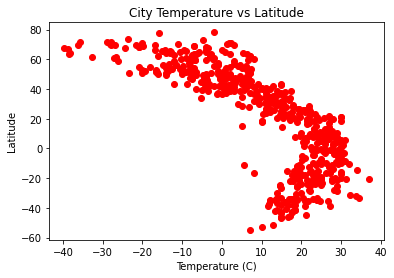

In [5]:
x_values = cities_weather_data_filtered["max_temp"]
y_values = cities_weather_data_filtered["lat"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (C)")
plt.savefig("Output/TempVLat.png")

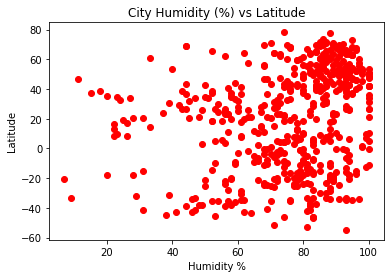

In [6]:
x_values = cities_weather_data_filtered["humidity"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity %")
plt.savefig("Output/HumidityVLat.png")

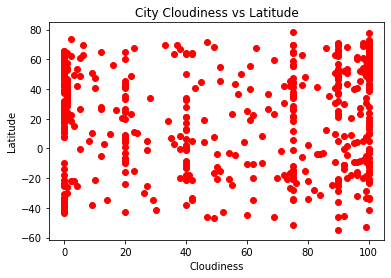

In [7]:
x_values = cities_weather_data_filtered["cloudiness"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.savefig("Output/CloudVLat.png")

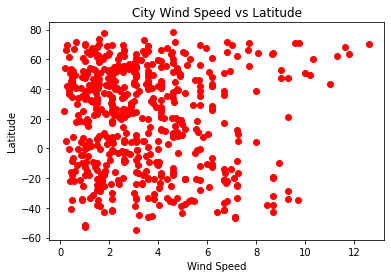

In [8]:
x_values = cities_weather_data_filtered["wind"]

plt.scatter(x_values,y_values, marker="o",color = "red")
plt.title("City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.savefig("Output/WindVLat.png")

### Linear Regression

Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude), and plot linear regression:

1. Northern Hemisphere - Temperature (F) vs. Latitude
2. Southern Hemisphere - Temperature (F) vs. Latitude
3. Northern Hemisphere - Humidity (%) vs. Latitude
4. Southern Hemisphere - Humidity (%) vs. Latitude
5. Northern Hemisphere - Cloudiness (%) vs. Latitude
6. Southern Hemisphere - Cloudiness (%) vs. Latitude
7. Northern Hemisphere - Wind Speed (mph) vs. Latitude
8. Southern Hemisphere - Wind Speed (mph) vs. Latitude

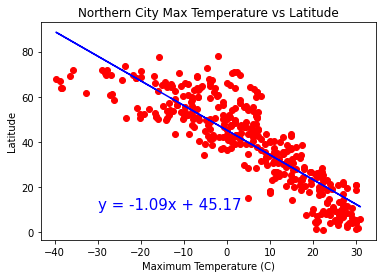

In [9]:
northern_cities = cities_weather_data_filtered[cities_weather_data_filtered['lat'] >= 0]
southern_cities = cities_weather_data_filtered[cities_weather_data_filtered['lat'] < 0]

x_values = northern_cities["max_temp"]
northern_y_values = northern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Maximum Temperature (C)")
plt.annotate(line_eq,(-30,10),fontsize=15,color="blue")

plt.plot(x_values,regress_values,"r-", color = "blue")

plt.savefig("Output/NorthTempVLat.png")

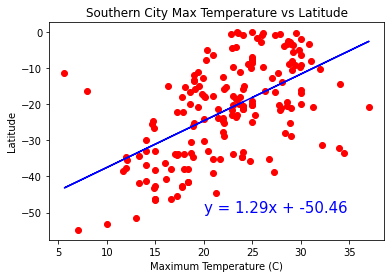

In [10]:
x_values = southern_cities["max_temp"]
southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Maximum Temperature (C)")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/SouthTempVLat.png")

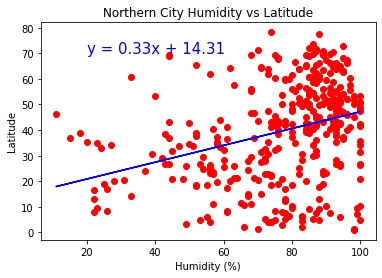

In [11]:
x_values = northern_cities["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Humidity vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.annotate(line_eq,(20,70),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/NorthHumidVLat.png")

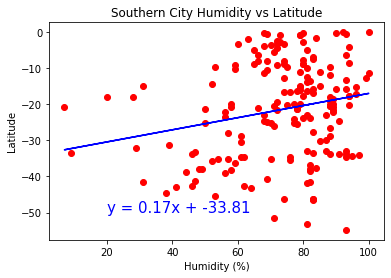

In [12]:
x_values = southern_cities["humidity"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Humidity vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/SouthHumidVLat.png")

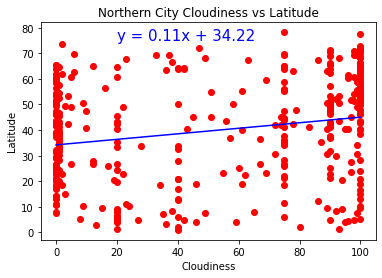

In [13]:
x_values = northern_cities["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.annotate(line_eq,(20,75),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/NorthCloudVLat.png")

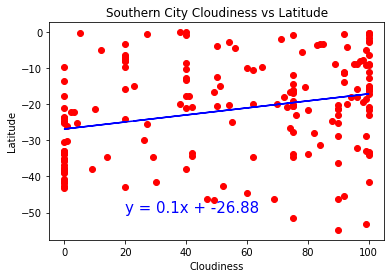

In [14]:
x_values = southern_cities["cloudiness"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.annotate(line_eq,(20,-50),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/SouthCloudVLat.png")

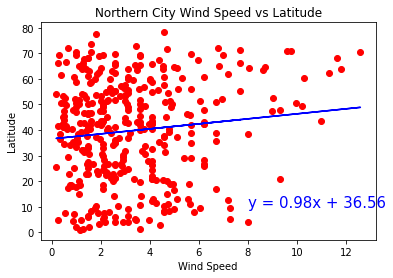

In [15]:
x_values = northern_cities["wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, northern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,northern_y_values, marker="o",color = "red")
plt.title("Northern City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.annotate(line_eq,(8,10),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/NorthWindVLat.png")

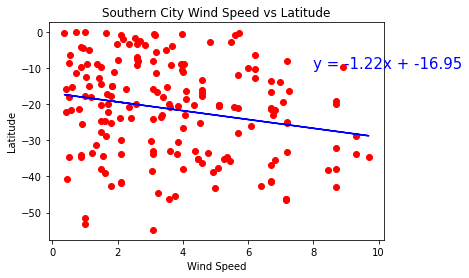

In [16]:
x_values = southern_cities["wind"]

southern_y_values = southern_cities["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, southern_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,southern_y_values, marker="o",color = "red")
plt.title("Southern City Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.annotate(line_eq,(8,-10),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-", color = "blue")
plt.savefig("Output/SouthWindVLat.png")